In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [26]:
data = pd.read_csv('/content/IMDb Movies India.csv',encoding='ISO-8859-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [27]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [28]:
data.dropna(inplace=True)
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [29]:
label_encoders = {}
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    data[feature] = label_encoders[feature].fit_transform(data[feature])

In [30]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)


LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64


In [36]:
print(y_pred)

[5.65833159 6.01425693 5.91972685 ... 5.73063614 5.82123948 5.99215887]


In [37]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.824204245176786
R-squared: 0.014872145511032775


In [38]:
new_movie_features = {'Genre': [label_encoders['Genre'].transform(['Drama'])[0]],
                       'Director': [label_encoders['Director'].transform(['Gaurav Bakshi'])[0]],
                       'Actor 1': [label_encoders['Actor 1'].transform(['Rasika Dugal'])[0]],
                       'Actor 2': [label_encoders['Actor 2'].transform(['Vivek Ghamande'])[0]],
                       'Actor 3': [label_encoders['Actor 3'].transform(['Arvind Jangid'])[0]]}
predicted_rating = model.predict(pd.DataFrame(new_movie_features))
print(f'Predicted Rating: {predicted_rating[0]}')

Predicted Rating: 223.2311351622958


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [39]:
print(predicted_rating)

[223.23113516]


In [40]:
new_movie_features

{'Genre': [229],
 'Director': [629],
 'Actor 1': [1352],
 'Actor 2': [2272],
 'Actor 3': [319]}

In [41]:
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [44]:
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [45]:
print(f'Mean Squared Error (Ridge): {mse}')
print(f'R-squared (Ridge): {r2}')


Mean Squared Error (Ridge): 1.8242025615367699
R-squared (Ridge): 0.014873054729768187


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

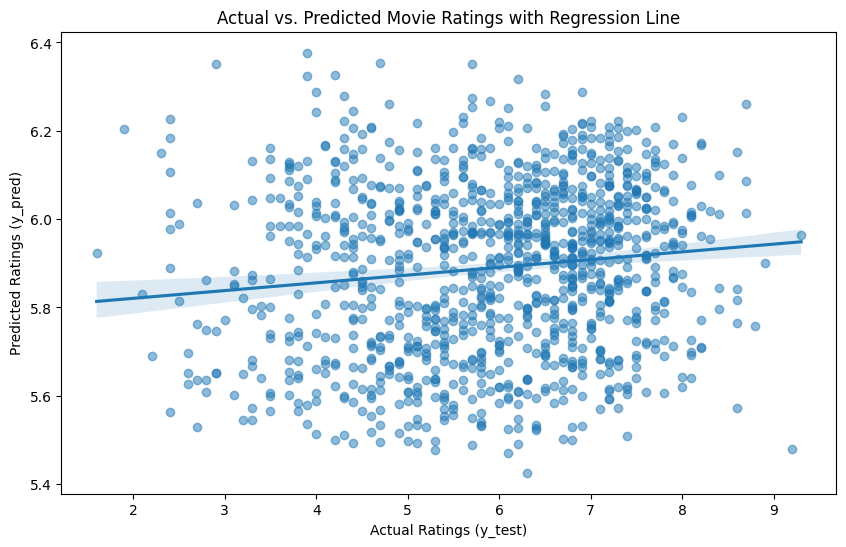

In [48]:
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.5})
plt.title("Actual vs. Predicted Movie Ratings with Regression Line")
plt.xlabel("Actual Ratings (y_test)")
plt.ylabel("Predicted Ratings (y_pred)")
plt.show()